# EmoNet: Advanced Emotion Classification Using NLP Techniques
## Problem Statement:

Create an advanced emotion classification model leveraging state-of-the-art Natural Language Processing (NLP) techniques to accurately identify and categorize emotions expressed in textual data. The objective is to develop a model capable of effectively predicting the emotional sentiment associated with each document in a given dataset. This entails training the model on a diverse corpus of documents annotated with corresponding emotion labels and optimizing its performance to achieve high accuracy and robustness in classifying emotions across various contexts. The resulting model should exhibit superior capabilities in understanding and interpreting nuanced emotional nuances, enabling its application in a wide range of real-world scenarios such as sentiment analysis, customer feedback analysis, and mood detection in conversational interfaces.

## Aim:

- Develop a high-performing emotion classification model using NLP techniques to accurately categorize emotions expressed in textual data.

## Dataset Attributes

- Text Data: Each entry contains a piece of text representing a statement or expression of emotion. These textual documents vary in length and content, reflecting the diverse range of emotional experiences.

- Emotion Label: The emotion label indicates the predominant emotion conveyed in the corresponding text data. Emotions such as sorrow, rage, happiness, amaze, care, and scare are represented in the dataset.

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import roc_curve, auc, classification_report
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
from sklearn.preprocessing import LabelEncoder, label_binarize
from itertools import cycle
warnings.filterwarnings('ignore')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Load Dataset

In [ ]:
train = pd.read_csv('train.csv')
train.head()

,Text,Emotion
0,i didnt feel humiliated,sorrow
1,i can go from feeling so hopeless to so damned...,sorrow
2,im grabbing a minute to post i feel greedy wrong,rage
3,i am ever feeling nostalgic about the fireplac...,care
4,i am feeling grouchy,rage


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     15000 non-null  object
 1   Emotion  15000 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


In [ ]:
train.shape

(15000, 2)

## The dataset has 2 columns and has 15000 rows. This info is obtained from the shape funciton above.

In [ ]:
train.describe(include='all')

,Text,Emotion
count,15000,15000
unique,14973,6
top,i was intensely conscious of how much cash i h...,happiness
freq,2,5034


<Axes: >

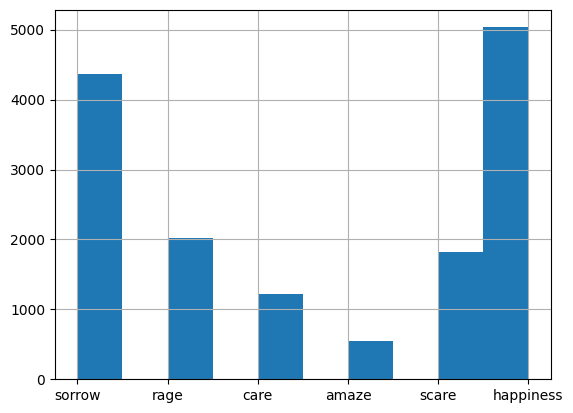

In [ ]:
train['Emotion'].hist()

### The above plot is a histogram that shows the frequency of each emotion.
- 1. Happiness labels are larger in number. 
- 2. Amaze emotions data is the least.

In [ ]:
train['Emotion'].unique()

array(['sorrow', 'rage', 'care', 'amaze', 'scare', 'happiness'],
      dtype=object)

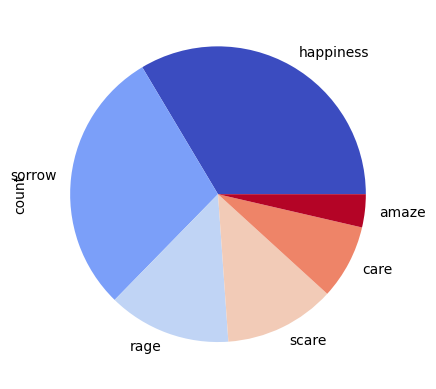

In [ ]:
emo_cnts = train['Emotion'].value_counts()
emo_cnts.plot(kind='pie', colormap='coolwarm')
plt.show()

### The above diagram is a pie chart that helps us analyze the distribution of emotions in our dataset. Sorrow and happiness are more in number in our dataset.

In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.casefold() not in stop_words and word.isalnum()]
    return " ".join(filtered_text)

train['Text'] = train['Text'].apply(preprocess_text)

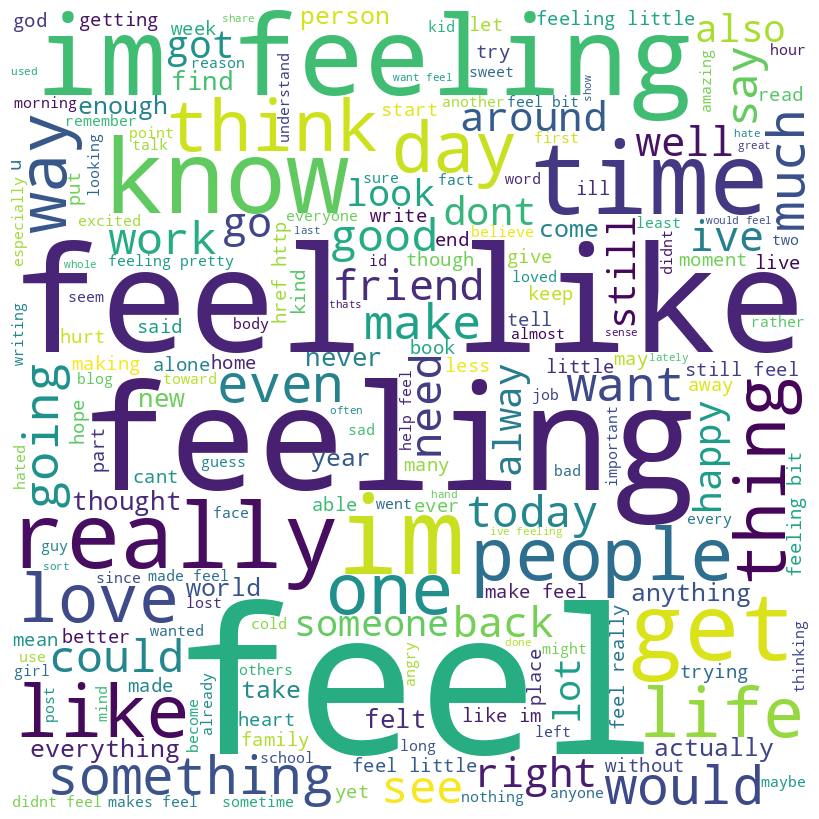

In [ ]:
text_data = ' '.join(train['Text'])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(text_data)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### we began by importing the necessary libraries and defining a function to preprocess the text data, which involved tokenization, removing stop words, and filtering non-alphanumeric characters. We then applied this preprocessing function to the 'Text' column of our DataFrame. Next, we combined all the preprocessed text data into a single string. Using the WordCloud library, we generated a word cloud from the preprocessed text data, specifying parameters such as width, height, background color, and stopwords. Finally, we displayed the word cloud using matplotlib.pyplot. Overall, our process involved text preprocessing, aggregation, word cloud generation, and visualization. The words that are larger in size are more in frequency and thus important.

### Trying and experimenting with TFID vectorizer.

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train['Text'])

In [ ]:
tokenized_text = [word_tokenize(i) for i in train['Text']]
model = Word2Vec(tokenized_text, min_count=1)

In [ ]:
dictionary = Dictionary(tokenized_text)
dictionary.filter_extremes(no_below=20, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in tokenized_text]
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=8)
topics = lda.print_topics(num_topics=8, num_words=10)
for topic in topics:
    print(topic)

(0, '0.128*"feeling" + 0.058*"im" + 0.019*"bit" + 0.012*"really" + 0.012*"today" + 0.011*"like" + 0.011*"little" + 0.011*"quite" + 0.010*"still" + 0.009*"time"')
(1, '0.015*"time" + 0.015*"really" + 0.014*"like" + 0.014*"think" + 0.013*"make" + 0.013*"strange" + 0.012*"want" + 0.011*"dont" + 0.011*"said" + 0.010*"never"')
(2, '0.039*"feeling" + 0.021*"im" + 0.020*"could" + 0.019*"right" + 0.015*"help" + 0.015*"feelings" + 0.013*"see" + 0.012*"happy" + 0.011*"friends" + 0.011*"god"')
(3, '0.071*"like" + 0.028*"really" + 0.020*"going" + 0.016*"think" + 0.016*"one" + 0.015*"people" + 0.012*"life" + 0.011*"feeling" + 0.011*"want" + 0.011*"every"')
(4, '0.068*"feeling" + 0.032*"like" + 0.032*"im" + 0.016*"days" + 0.016*"still" + 0.015*"ive" + 0.012*"http" + 0.012*"good" + 0.010*"href" + 0.010*"things"')
(5, '0.057*"feeling" + 0.031*"like" + 0.016*"get" + 0.012*"ive" + 0.012*"got" + 0.011*"year" + 0.011*"could" + 0.011*"take" + 0.008*"would" + 0.008*"vain"')
(6, '0.056*"feeling" + 0.036*"im"

### Steps we used: 
1. **Tokenization:** We began by tokenizing the text data using NLTK's `word_tokenize` function. This step gave us a list of tokenized texts for each entry in the 'Text' column of the train DataFrame.

2. **Word2Vec Model Construction:** Next, we used Gensim's Word2Vec class to construct a Word2Vec model. This model learns vector representations of words based on their contextual usage within the text corpus.

3. **Setting Parameters:** Specifically, we set the `min_count` parameter to 1 so that all words are considered during training. This ensures that even infrequent words contribute to the learned representations.

4. **Semantic Relationship :** Before applying Latent Dirichlet Allocation (LDA), it is crucial to obtain meaningful representations of words. So we used Word2Vec which facilitates it by capturing semantic relationships between words in the corpus.

5. **Leveraging Word2Vec:** By leveraging the trained Word2Vec model, we can extract insights from the dataset through techniques like topic modeling. This is important because it helps to identify trends and insights valuable before modeling.

6. **Topic Modeling with LDA:**  Latent Dirichlet Allocation (LDA) is Topic modeling which allowed us to identify latent topics within the text data. This process unveiled the hidden themes and provided us a deeper understanding of the underlying content.

7. **Overall Approach:** This multi-step approach enables us to preprocess the text effectively and leverage the semantic information captured by Word2Vec. These enriched representations enhance the performance of subsequent analyses, such as topic modeling with LDA.

In [ ]:
le = LabelEncoder()
y = le.fit_transform(train['Emotion'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [ ]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=47)),
    ('SVM', SVC(random_state=47, probability=True)),
    #('xgb', xgb.XGBClassifier(use_label_encoder=True, eval_metric='mlogloss')),
    ('NB', GaussianNB()),
    #('rf',RandomForestClassifier())
]
hyperparameters = [
    {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'max_iter':[50,100,200]},
    #{'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [30, 50, 100],'early_stoping_rounds':[3,5,10]},
    {'priors':[None]},
    #{'n_estimators':[100,200,300],'criterion':['gini','entropy','logloss'],}
]
kfold = KFold(n_splits=5, shuffle=True, random_state=47)

In [ ]:
def hyperparams(models, hyperparameters, X_train, y_train, X_val, y_val,kfold):
    y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
    y_val_bin = label_binarize(y_val, classes=np.unique(y_train))
    for (name, model), params in zip(models, hyperparameters):
        clf = GridSearchCV(model, params, cv=kfold)
        if name == 'xgb' or name=='NB':
            X_train = X_train.toarray()
            X_val = X_val.toarray()
        clf.fit(X_train, y_train)
        print(f"Best parameters for {name}: {clf.best_params_}")
        y_pred = clf.predict(X_val)
        report = classification_report(y_val, y_pred, zero_division=0)
        y_prob = clf.predict_proba(X_val)
        print(f"Classification report for {name}:\n{report}")
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(y_train_bin.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        plt.figure()
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
        for i, color in zip(range(y_train_bin.shape[1]), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic for '+name)
        plt.legend(loc="lower right")
        plt.show()

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.67      0.76       115
           1       0.82      0.64      0.72       238
           2       0.86      0.95      0.90      1004
           3       0.88      0.84      0.86       401
           4       0.86      0.82      0.84       354
           5       0.91      0.92      0.92       888

    accuracy                           0.88      3000
   macro avg       0.87      0.81      0.83      3000
weighted avg       0.88      0.88      0.87      3000



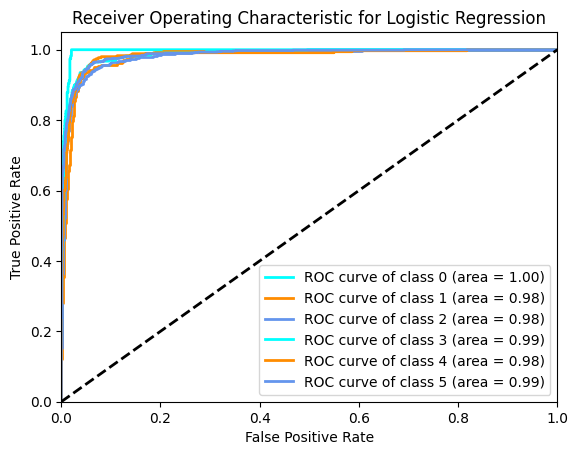

Best parameters for SVM: {'C': 10, 'kernel': 'rbf', 'max_iter': 200}
Classification report for SVM:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       115
           1       0.68      0.75      0.71       238
           2       0.78      0.86      0.82      1004
           3       0.81      0.79      0.80       401
           4       0.80      0.79      0.80       354
           5       0.88      0.76      0.82       888

    accuracy                           0.80      3000
   macro avg       0.78      0.79      0.79      3000
weighted avg       0.81      0.80      0.80      3000



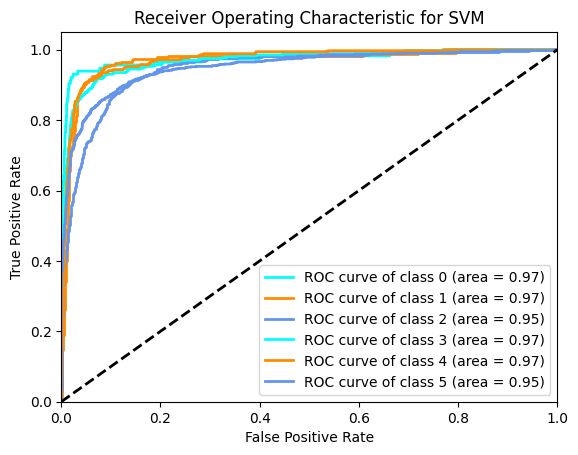

Best parameters for NB: {'priors': None}
Classification report for NB:
              precision    recall  f1-score   support

           0       0.12      0.22      0.16       115
           1       0.17      0.31      0.22       238
           2       0.54      0.42      0.47      1004
           3       0.34      0.37      0.36       401
           4       0.30      0.42      0.35       354
           5       0.46      0.35      0.40       888

    accuracy                           0.37      3000
   macro avg       0.32      0.35      0.33      3000
weighted avg       0.42      0.37      0.39      3000



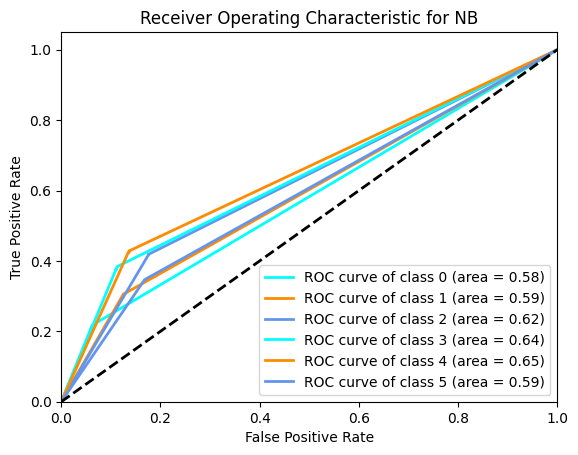

In [ ]:
hyperparams(models,hyperparameters,X_train,y_train,X_test,y_test,kfold)

- All six ROC curves have a high AUC, ranging from 0.98 to 1.00. This indicates that the logistic regression model is performing very well at classifying all six classes.
- All six ROC curves have a high AUC, ranging from 0.95 to 0.97. This indicates that the SVM model is performing well at classifying all six classes. Class 0, Class 2, Class 5 and Class 4 appear to have the highest AUC (0.97), while Class 1 and Class 3 have a slightly lower AUC (0.95). This suggests that the model might be slightly less accurate in classifying Class 1 and Class 3 compared to the other classes

In [ ]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 2.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
import torch

# Specify the device type (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=6)
model = model.to(device)

#X = tokenizer(train['Text'].to_list(), return_tensors='pt')
# Split the data into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(train['Text'], y, test_size=0.2, random_state=47)

# Encode the texts
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, return_tensors='pt')
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, return_tensors='pt')

# Define a PyTorch Dataset for your data
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
          item['labels'] = torch.tensor(self.labels[idx]).type(torch.LongTensor)
        return item
    def __len__(self):
      if self.labels is not None:
          return len(self.labels)
      else:
          return len(self.encodings['input_ids'])
# Create Datasets for your training and test data
train_dataset = EmotionDataset(train_encodings, train_labels)
test_dataset = EmotionDataset(test_encodings, test_labels)
# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)
# Create the Trainer and train the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)
trainer.train()
# Evaluate the model
trainer.evaluate()
preds = trainer.predict(test_dataset)
# Convert the predictions to labels
pred_labels = preds.predictions.argmax(-1)
# Print the classification report
print(classification_report(test_labels, pred_labels))

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
500,0.891000
1000,0.306800
1500,0.215000
2000,0.137500


              precision    recall  f1-score   support

           0       0.72      0.96      0.82       115
           1       0.83      0.83      0.83       238
           2       0.95      0.94      0.95      1004
           3       0.95      0.93      0.94       401
           4       0.94      0.85      0.89       354
           5       0.97      0.98      0.98       888

    accuracy                           0.93      3000
   macro avg       0.89      0.91      0.90      3000
weighted avg       0.94      0.93      0.93      3000



The classification report summarizes the model's performance metrics, including precision, recall, and F1-score, for each class label. Overall, the model achieved high accuracy, with F1-scores ranging from 0.82 to 0.98 across different classes. These metrics provide insights into the model's ability to correctly classify instances and its overall effectiveness in handling the dataset.

In [ ]:
test = pd.read_csv('test.csv')
train_encodings = tokenizer(train['Text'].tolist(), truncation=True, padding=True, return_tensors='pt')
test_encodings = tokenizer(test['Text'].tolist(), truncation=True, padding=True, return_tensors='pt')

In [ ]:
train_dataset = EmotionDataset(train_encodings, y)
test_dataset = EmotionDataset(test_encodings, None)

In [ ]:
training_args = TrainingArguments(
    output_dir='./results_actual',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset
)

In [ ]:
trainer.train()

Step,Training Loss
500,0.158100
1000,0.197100
1500,0.166700
2000,0.130100
2500,0.102200


TrainOutput(global_step=2814, training_loss=0.1443998849214013, metrics={'train_runtime': 690.0983, 'train_samples_per_second': 65.208, 'train_steps_per_second': 4.078, 'total_flos': 1688185270260000.0, 'train_loss': 0.1443998849214013, 'epoch': 3.0})

In [ ]:
len(test_dataset)

1000

In [ ]:
preds = trainer.predict(test_dataset)

In [ ]:
preds

PredictionOutput(predictions=array([[-1.5079945 , -0.02788966,  8.082767  , -2.053032  , -2.9464169 ,
        -1.5031089 ],
       [-0.6739502 , -1.4388005 , -2.5213978 , -1.6917979 ,  7.8263855 ,
        -0.6656549 ],
       [-1.566518  , -1.6103604 , -2.3322964 ,  7.734481  , -1.4403572 ,
        -0.88530624],
       ...,
       [-1.2140421 , -1.4167006 , -2.1569853 , -1.3122269 ,  7.6828556 ,
        -0.72883606],
       [-1.9305887 , -0.09551146,  8.038844  , -1.7282256 , -2.8051577 ,
        -1.3333203 ],
       [-2.8819454 ,  6.895404  ,  0.2937639 , -0.2412289 , -3.4007301 ,
        -0.9075153 ]], dtype=float32), label_ids=None, metrics={'test_runtime': 3.6264, 'test_samples_per_second': 275.756, 'test_steps_per_second': 4.412})

In [ ]:
pred_labels = preds.predictions.argmax(-1)
pred_labels

array([2, 4, 3, 1, 4, 4, 5, 3, 2, 2, 5, 1, 2, 4, 1, 4, 5, 5, 2, 2, 2, 2,
       5, 1, 4, 5, 4, 4, 1, 2, 2, 4, 2, 2, 2, 5, 1, 5, 4, 3, 3, 5, 3, 5,
       2, 5, 5, 1, 2, 3, 2, 5, 2, 2, 5, 0, 4, 4, 3, 3, 3, 5, 1, 5, 3, 2,
       2, 2, 3, 2, 1, 2, 5, 4, 5, 0, 4, 5, 3, 3, 5, 1, 5, 2, 5, 0, 1, 2,
       3, 2, 0, 2, 5, 3, 5, 3, 2, 3, 4, 3, 1, 5, 2, 2, 5, 2, 1, 3, 2, 2,
       2, 5, 2, 2, 3, 5, 2, 5, 5, 5, 5, 3, 3, 1, 5, 4, 3, 3, 2, 2, 2, 5,
       2, 2, 5, 2, 5, 5, 2, 5, 5, 2, 4, 1, 2, 1, 2, 5, 5, 3, 5, 4, 2, 3,
       2, 5, 3, 5, 2, 5, 5, 4, 5, 5, 5, 4, 2, 3, 1, 0, 2, 2, 4, 5, 4, 4,
       3, 5, 3, 2, 5, 5, 5, 2, 5, 1, 4, 5, 5, 1, 5, 2, 3, 5, 5, 3, 5, 2,
       4, 5, 1, 3, 2, 5, 2, 5, 5, 2, 2, 2, 5, 5, 5, 5, 2, 5, 1, 2, 4, 2,
       2, 5, 2, 2, 5, 5, 2, 5, 3, 3, 2, 1, 5, 5, 5, 5, 2, 0, 2, 4, 0, 0,
       4, 2, 0, 2, 2, 5, 2, 4, 3, 3, 5, 2, 2, 2, 3, 3, 5, 3, 0, 2, 2, 2,
       1, 0, 2, 5, 4, 1, 5, 3, 3, 5, 1, 5, 1, 5, 3, 5, 5, 2, 3, 2, 2, 4,
       1, 2, 4, 5, 3, 2, 2, 2, 2, 2, 0, 5, 1, 5, 5,

In [ ]:
pred_labels = le.inverse_transform(pred_labels)
pred_labels

array(['happiness', 'scare', 'rage', 'care', 'scare', 'scare', 'sorrow',
       'rage', 'happiness', 'happiness', 'sorrow', 'care', 'happiness',
       'scare', 'care', 'scare', 'sorrow', 'sorrow', 'happiness',
       'happiness', 'happiness', 'happiness', 'sorrow', 'care', 'scare',
       'sorrow', 'scare', 'scare', 'care', 'happiness', 'happiness',
       'scare', 'happiness', 'happiness', 'happiness', 'sorrow', 'care',
       'sorrow', 'scare', 'rage', 'rage', 'sorrow', 'rage', 'sorrow',
       'happiness', 'sorrow', 'sorrow', 'care', 'happiness', 'rage',
       'happiness', 'sorrow', 'happiness', 'happiness', 'sorrow', 'amaze',
       'scare', 'scare', 'rage', 'rage', 'rage', 'sorrow', 'care',
       'sorrow', 'rage', 'happiness', 'happiness', 'happiness', 'rage',
       'happiness', 'care', 'happiness', 'sorrow', 'scare', 'sorrow',
       'amaze', 'scare', 'sorrow', 'rage', 'rage', 'sorrow', 'care',
       'sorrow', 'happiness', 'sorrow', 'amaze', 'care', 'happiness',
       'rage

In [ ]:
len(pred_labels)

1000

In [ ]:
pred = pd.DataFrame(pred_labels)
pred.to_csv('./submission.csv', index = False)

In [ ]:
from sklearn.metrics import balanced_accuracy_score

def evaluation_metrics(y_test, y_pred):
    # Calculate the balanced accuracy score
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Return the balanced accuracy as a single digit number
    print('The Balanced accuracy is : ', balanced_accuracy)